In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
from statsmodels.stats.weightstats import DescrStatsW 

In [12]:
allDataPath = "/shared/3/projects/benlitterer/podcastData/processed/mayJune/mayJuneDataRoles.feather"
#df = pd.read_json(allDataPath, orient="records", lines=True)
df = pd.read_feather(allDataPath)

In [13]:
transcriptTopicsPath = "/shared/3/projects/benlitterer/podcastData/topicModelling/200/transcripts/doc_topics.txt"
transcriptTopics = pd.read_csv(transcriptTopicsPath, sep="\t", header=None, index_col=0)

In [14]:
transcriptTopics.columns = ["potentialOutPath"] + list(range(0, 200))

In [15]:
transcriptTopics.head() 

,potentialOutPath,0,1,2,3,4,5,6,7,8,...,190,191,192,193,194,195,196,197,198,199
0,,,,,,,,,,,,,,,,,,,,,
0,/www.buzzsprout.com/o3/httpswww.buzzsprout.com...,0.000126,0.000206,0.000532,0.000197,0.000351,0.000353,0.000823,0.000674,0.000929,...,0.000252,0.000433,0.000305,0.000282,0.000448,0.000543,0.001363,0.000719,0.000390,0.000289
1,/www.buzzsprout.com/83/httpswww.buzzsprout.com...,0.000121,0.000199,0.000512,0.000189,0.000338,0.000340,0.000793,0.000649,0.000895,...,0.000243,0.000417,0.000294,0.000271,0.000432,0.000523,0.019715,0.000692,0.000375,0.000278
2,/www.buzzsprout.com/3y/httpswww.buzzsprout.com...,0.000022,0.000036,0.000093,0.000034,0.000061,0.000062,0.000144,0.000118,0.000162,...,0.000044,0.000076,0.000053,0.000049,0.000078,0.000095,0.003579,0.000126,0.133695,0.000050
3,/www.buzzsprout.com/3r/httpswww.buzzsprout.com...,0.000031,0.000051,0.000132,0.000049,0.000087,0.000088,0.000205,0.019184,0.000231,...,0.000063,0.000108,0.000076,0.000070,0.000112,0.000135,0.000339,0.000179,0.000097,0.000072
4,/www.buzzsprout.com/30/httpswww.buzzsprout.com...,0.000027,0.000044,0.000113,0.000042,0.000075,0.000075,0.000175,0.000143,0.000197,...,0.000054,0.000092,0.000065,0.000060,0.000095,0.000115,0.004349,0.000153,0.268003,0.000061


In [16]:
RJCols = [5, 13, 57, 69, 159, 164]
transcriptTopics["RJSum"] =  transcriptTopics[RJCols].apply(sum, axis=1)

<Axes: xlabel='RJSum'>

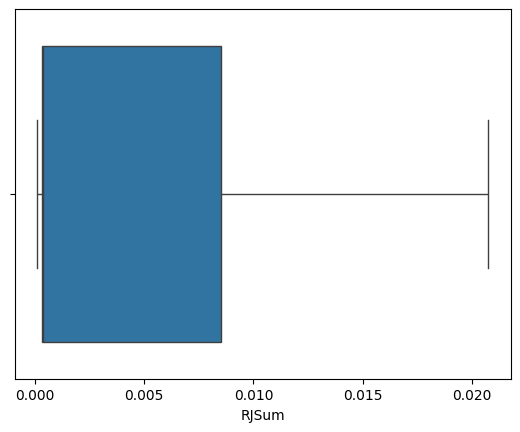

In [17]:
sns.boxplot(data=transcriptTopics, x="RJSum", showfliers=False)

In [18]:
#we need to merge no matter what
merged = pd.merge(df, transcriptTopics, on="potentialOutPath", how="inner")

In [19]:
merged["cleanDatesLoc"] = pd.to_datetime(merged["cleanDatesLoc"], unit="ms")

In [ ]:
#what do these cols mean? 
'''
13 - general george floyd 
57 - BLM 
159 - focus is more on policing and minneapolis 
164 - more about racism as a concept 
69 - more general society and culture 
5- American History 
'''

/tmp/ipykernel_1829532/2216866873.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette=colors)


<Axes: >

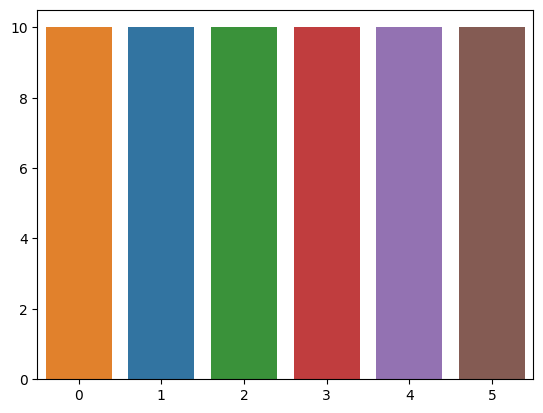

In [22]:
colors = [ '#ff7f0e','#1f77b4', '#2ca02c', '#d62728', '#9467bd','#8c564b']
x = list(range(len(colors)))
y = [10 for i in x]
sns.barplot(x=x, y=y, palette=colors)

/tmp/ipykernel_1829532/3732364791.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(meltedTopics, x="value", y = "variable", orient="h", estimator="mean", order=topicsOrder, ax=ax, palette=[topicColorMapping[topic] for topic in topicsOrder])
/tmp/ipykernel_1829532/3732364791.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([topicLabelMapping[topic] for topic in topicsOrder])


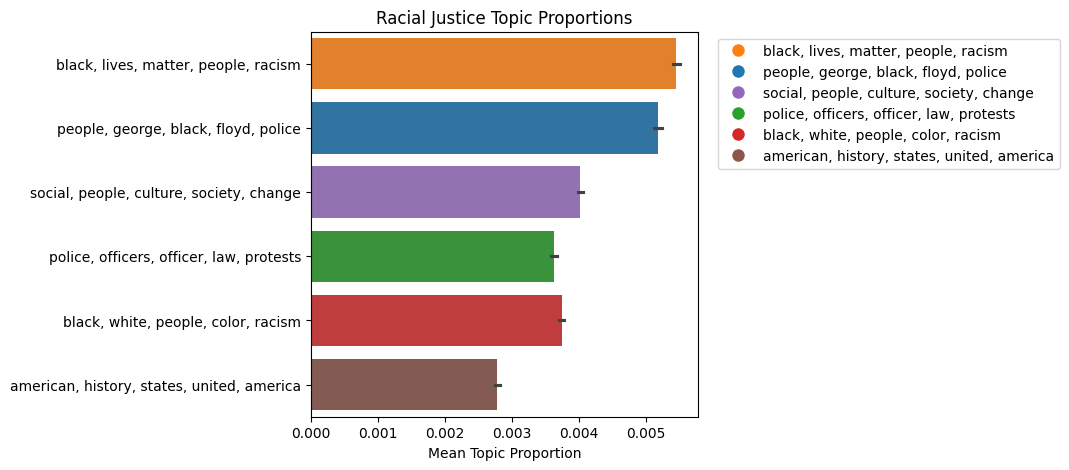

In [24]:
fig, ax = plt.subplots(figsize=(5, 5))
meltedTopics = merged[RJCols].melt()

topics = [13, 57, 159, 164, 69, 5]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
topicLabels = ["people, george, black, floyd, police", "black, lives, matter, people, racism","police, officers, officer, law, protests", "black, white, people, color, racism","social, people, culture, society, change","american, history, states, united, america"]
labelColorMapping = dict(zip(topicLabels, colors))
topicColorMapping = dict(zip(topics,colors))
topicLabelMapping = dict(zip(topics, topicLabels))

#topics = [13, 57, 159, 164, 69, 5]
topicsOrder = [57, 13, 69, 159, 164, 5]
colors = ['#ff7f0e', '#2ca02c', '#d62728', '#9467bd','#1f77b4','#8c564b']
sns.barplot(meltedTopics, x="value", y = "variable", orient="h", estimator="mean", order=topicsOrder, ax=ax, palette=[topicColorMapping[topic] for topic in topicsOrder])

ax.set_yticklabels([topicLabelMapping[topic] for topic in topicsOrder])

# Create custom legend elements with the specified colors and labels
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=topicColorMapping[topic], markersize=10) for topic in topicsOrder]

ax.set_xlabel("Mean Topic Proportion")
ax.set_ylabel("")
ax.set_title("Racial Justice Topic Proportions")

# Add a single legend underneath the entire figure
ax.legend(legend_elements, [topicLabelMapping[topic] for topic in topicsOrder], loc='upper right', ncol=1, fontsize='medium', bbox_to_anchor=(1.95, 1))
plt.savefig("/shared/3/projects/benlitterer/podcastData/figures/FloydFigures/catProps.pdf", bbox_inches="tight") 
plt.savefig("/shared/3/projects/benlitterer/podcastData/figures/FloydFigures/catProps.png", bbox_inches="tight", dpi=800) 

/tmp/ipykernel_1829532/31753793.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(meltedTopics, x="value", y = "variable", orient="h", estimator="mean", order=topicsOrder, ax=ax, palette=[topicColorMapping[topic] for topic in topicsOrder])
/tmp/ipykernel_1829532/31753793.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([topicLabelMapping[topic] for topic in topicsOrder])


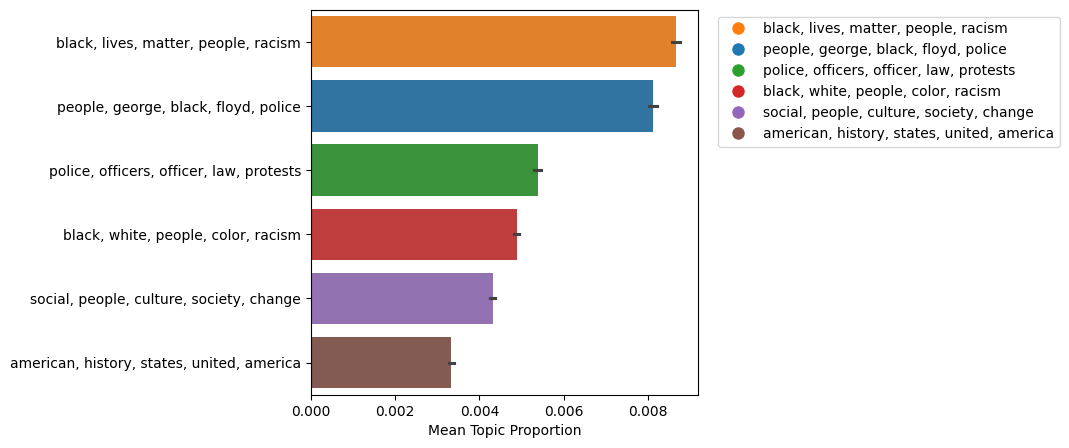

In [25]:
fig, ax = plt.subplots(figsize=(5, 5))
afterFloyd = merged.loc[merged["cleanDatesLoc"] > "2020-05-25", RJCols + ["cleanDatesLoc"]]
meltedTopics = afterFloyd[RJCols].melt()

#write data so we can just modify figure as we need to 
meltedTopics.to_csv("/shared/3/projects/benlitterer/podcastData/figureData/floydFigures/categoryPropData.csv")

topics = [13, 57, 159, 164, 69, 5]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
topicLabels = ["people, george, black, floyd, police", "black, lives, matter, people, racism","police, officers, officer, law, protests", "black, white, people, color, racism","social, people, culture, society, change","american, history, states, united, america"]
labelColorMapping = dict(zip(topicLabels, colors))
topicColorMapping = dict(zip(topics,colors))
topicLabelMapping = dict(zip(topics, topicLabels))

#topics = [13, 57, 159, 164, 69, 5]
topicsOrder = [57, 13, 159, 164, 69, 5]
colors = ['#ff7f0e', '#2ca02c', '#d62728', '#9467bd','#1f77b4','#8c564b']
sns.barplot(meltedTopics, x="value", y = "variable", orient="h", estimator="mean", order=topicsOrder, ax=ax, palette=[topicColorMapping[topic] for topic in topicsOrder])

ax.set_yticklabels([topicLabelMapping[topic] for topic in topicsOrder])

# Create custom legend elements with the specified colors and labels
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=topicColorMapping[topic], markersize=10) for topic in topicsOrder]

ax.set_xlabel("Mean Topic Proportion")
ax.set_ylabel("")
#ax.set_title("Racial Justice Topic Proportions")

# Add a single legend underneath the entire figure
ax.legend(legend_elements, [topicLabelMapping[topic] for topic in topicsOrder], loc='upper right', ncol=1, fontsize='medium', bbox_to_anchor=(1.95, 1))
plt.savefig("/shared/3/projects/benlitterer/podcastData/figures/FloydFigures/catPropsAfterFloyd.pdf", bbox_inches="tight") 
plt.savefig("/shared/3/projects/benlitterer/podcastData/figures/FloydFigures/catPropsAfterFloyd.png", bbox_inches="tight", dpi=800) 

In [26]:
groupedPeople = merged.set_index('cleanDatesLoc')[RJCols + ["RJSum"]].groupby([pd.Grouper(freq='3D')]).agg(np.mean).reset_index()
groupedPeople = groupedPeople.melt(id_vars=["cleanDatesLoc"], value_vars=RJCols + ["RJSum"])

/tmp/ipykernel_1829532/3911960734.py:1: FutureWarning: The provided callable <function mean at 0x7f168f1e8a40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  groupedPeople = merged.set_index('cleanDatesLoc')[RJCols + ["RJSum"]].groupby([pd.Grouper(freq='3D')]).agg(np.mean).reset_index()


In [27]:
dateDf = merged[["cleanDatesLoc"] + RJCols].set_index("cleanDatesLoc").sort_index() 
minDate = min(dateDf.index)
maxDate = max(dateDf.index)

    

In [28]:
dateDf = merged[["cleanDatesLoc"] + RJCols].set_index("cleanDatesLoc").sort_index() 
minDate = min(dateDf.index)
maxDate = max(dateDf.index)

outputDfs = []

for date in pd.date_range(minDate, maxDate): 
    #get the three days before if they exist 
    currDf = dateDf[date - pd.Timedelta(days=1) : date + pd.Timedelta(days=1)]
    means = currDf.apply("mean")
    stdevs = currDf.apply("std")
    n = len(currDf)
    
    #here are the actual t-distribution confidence intervals 
    CIs = currDf.apply(lambda x: DescrStatsW(x).tconfint_mean(), axis=0)
    currOutput = pd.concat([means, CIs.T], axis=1)
    currOutput.columns = ["mean", "CI_left", "CI_right"]
    currOutput["date"] = date
    outputDfs.append(currOutput)


rollingDf = pd.concat(outputDfs, axis=0).reset_index().rename(columns={"index":"topic"})

In [29]:
#what do these cols mean? 
'''
13 - general george floyd 
57 - BLM 
159 - focus is more on policing and minneapolis 
164 - more about racism as a concept 
69 - more general society and culture 
5- American History 
'''

'\n13 - general george floyd \n57 - BLM \n159 - focus is more on policing and minneapolis \n164 - more about racism as a concept \n69 - more general society and culture \n5- American History \n'

In [30]:
tab10 = ["#1f77b4", 
"#ff7f0e", 
"#2ca02c", 
"#d62728", 
"#9467bd", 
"#8c564b", 
"#e377c2", 
"#7f7f7f", 
"#bcbd22", 
"#17becf"]


In [31]:
tab10[:6]

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

/tmp/ipykernel_1829532/1460119094.py:18: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.lineplot(rollingDf, x="date", y="mean", hue="topic", hue_order=topics, palette=palette)
/tmp/ipykernel_1829532/1460119094.py:43: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  ax.legend(legend_elements, labels=topicList, loc="upper left")


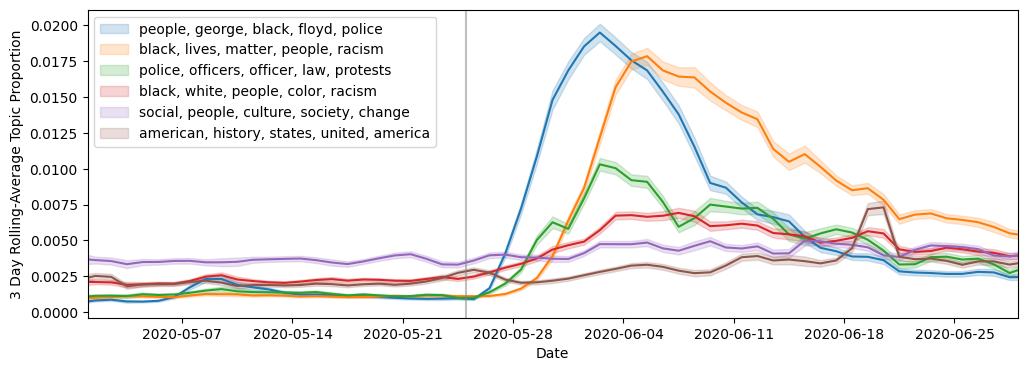

In [32]:
#output rolling df so we can reproduce the figure 
rollingDf.to_csv("/shared/3/projects/benlitterer/podcastData/figureData/floydFigures/topicTimeSeriesData.csv")

#topics in the ordering we want 
topics = [13, 57, 159, 164, 69, 5]

#palette = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f']
palette=tab10
fig, ax = plt.subplots(figsize=(12, 4), sharex=True)


#we need to add the confidence bands
for i, topic in enumerate(topics): 
    currData = rollingDf[rollingDf["topic"] == topic]
    ax.fill_between(currData["date"], currData["CI_left"], currData["CI_right"], color=palette[i], alpha=.2) 

#plot the actual lines 
sns.lineplot(rollingDf, x="date", y="mean", hue="topic", hue_order=topics, palette=palette)


ax.axvline(pd.to_datetime("2020-05-25"), color="grey", alpha=.5)

#what do these cols mean? 
'''
13 - general george floyd 
57 - BLM 
159 - focus is more on policing and minneapolis 
164 - more about racism as a concept 
69 - more general society and culture 
5- American History 
'''

# Define the colors and labels for the legend
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
topicList = ["people, george, black, floyd, police", "black, lives, matter, people, racism","police, officers, officer, law, protests", "black, white, people, color, racism","social, people, culture, society, change","american, history, states, united, america"]

colorMapping = dict(zip(topicList, colors))

# Create custom legend elements with the specified colors and labels
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colorMapping[topic], markersize=10) for topic in topicList]

#fig.legend(legend_elements, titleList, loc='lower center', ncol=3, fontsize='large', bbox_to_anchor=(0.5, -0.1))
ax.legend(legend_elements, labels=topicList, loc="upper left")
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
ax.set_xlabel("Date")
ax.set_ylabel("3 Day Rolling-Average Topic Proportion")
ax.set_xlim(pd.Timestamp("2020-05-01"), pd.Timestamp("2020-06-29"))
#fig.suptitle("Temporal Evolution of Topics Relating to George Floyd and Racial Justice")


#ax.set_title("Guest Network: Color by Category, Shape by Mention of George Floyd")
plt.savefig("/shared/3/projects/benlitterer/podcastData/figures/FloydFigures/OverallTimeSeries.pdf", bbox_inches="tight") 
plt.savefig("/shared/3/projects/benlitterer/podcastData/figures/FloydFigures/OverallTimeSeries.png", bbox_inches="tight", dpi=800) 

In [33]:
topics

[13, 57, 159, 164, 69, 5]

In [34]:

catList = ["news", "sports", "business", "religion", "society", "education"]
rollingDfs = []
for i, currCat in enumerate(catList): 

    dateDf = merged.loc[merged["category1"] == currCat, ["cleanDatesLoc"] + RJCols].set_index("cleanDatesLoc").sort_index() 

    minDate = min(dateDf.index)
    maxDate = max(dateDf.index)

    outputDfs = []

    for date in pd.date_range(minDate, maxDate): 
        #get the three days before if they exist 
        currDf = dateDf[date - pd.Timedelta(days=1) : date + pd.Timedelta(days=1)]
        means = currDf.apply("mean")
        stdevs = currDf.apply("std")
        n = len(currDf)
        
        #here are the actual t-distribution confidence intervals 
        CIs = currDf.apply(lambda x: DescrStatsW(x).tconfint_mean(), axis=0)
        currOutput = pd.concat([means, CIs.T], axis=1)
        currOutput.columns = ["mean", "CI_left", "CI_right"]
        currOutput["date"] = date
        outputDfs.append(currOutput)
        
        rollingDf = pd.concat(outputDfs, axis=0).reset_index().rename(columns={"index":"topic"})

    rollingDf["category"] = currCat
    rollingDfs.append(rollingDf)

#write data for reproducibility 
rollingDf = pd.concat(rollingDfs) 
rollingDf.to_csv("/shared/3/projects/benlitterer/podcastData/figureData/floydFigures/categoryTimeSeriesData.csv")

/tmp/ipykernel_1829532/775043982.py:25: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.lineplot(rollingDf, x="date", y="mean", hue="topic", hue_order=topics, palette=palette, ax=axs[row, col])
/tmp/ipykernel_1829532/775043982.py:25: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.lineplot(rollingDf, x="date", y="mean", hue="topic", hue_order=topics, palette=palette, ax=axs[row, col])
/tmp/ipykernel_1829532/775043982.py:25: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.lineplot(rollingDf, x="date", y="mean", hue="topic", hue_order=topics, palette=palette, ax=axs[row, col])
/tmp/ipykernel_1829532/775043982.py:25: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.lineplot(rollingDf, x="date", y="mean", hue="topic", hue_order=topics, palette=palette, ax=axs[row, col])
/tmp/ipykern

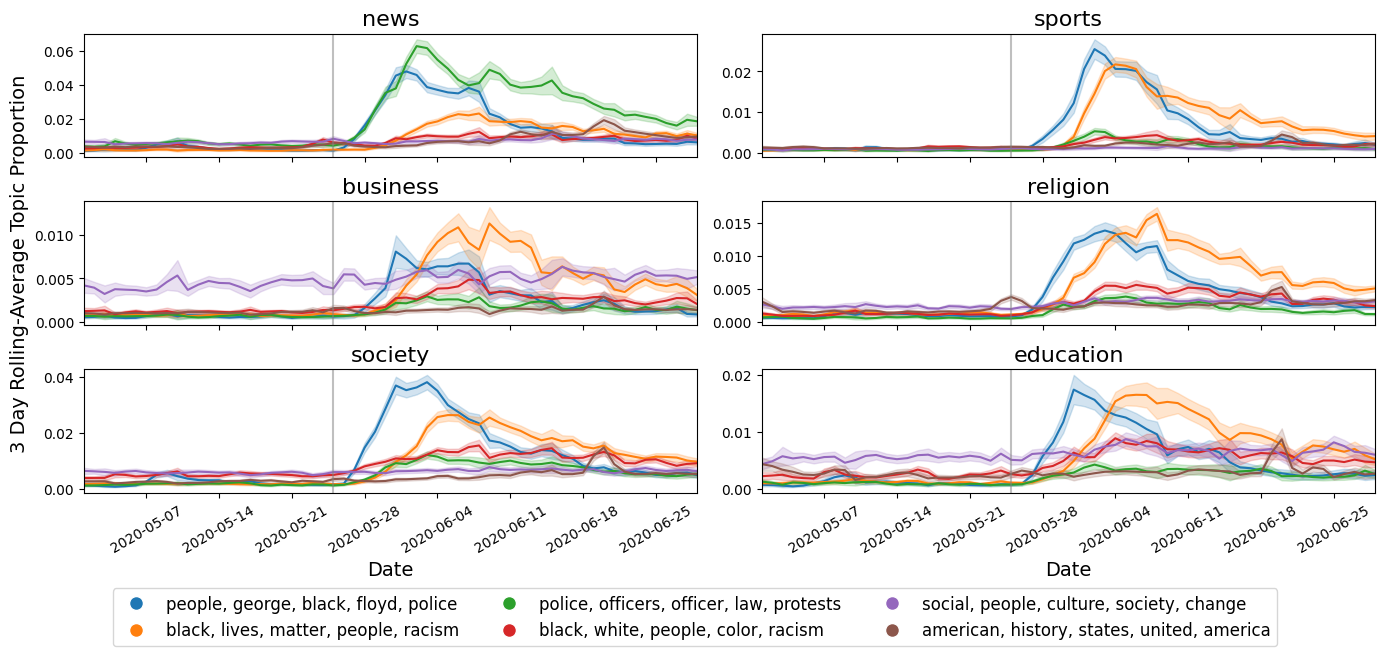

In [36]:
inDf = pd.read_csv("/shared/3/projects/benlitterer/podcastData/figureData/floydFigures/categoryTimeSeriesData.csv")
inDf["date"] = pd.to_datetime(inDf["date"])

catList = ["news", "sports", "business", "religion", "society", "education"]

#topics in the ordering we want 
topics = [13, 57, 159, 164, 69, 5]

#ok now remake figure with different topics 
ROWS = 3
COLS = 2 
fig, axs = plt.subplots(ROWS, COLS, figsize=(14, 6), sharex=True)
counter = 0 
for row in range(ROWS): 
    for col in range(COLS): 
        currCat = catList[counter]
        rollingDf = inDf[inDf["category"] == currCat]

        #we need to add the confidence bands
        for i, topic in enumerate(topics): 
            currData = rollingDf[rollingDf["topic"] == topic]
            axs[row, col].fill_between(currData["date"], currData["CI_left"], currData["CI_right"], color=palette[i], alpha=.2) 

        #plot the actual lines 
        sns.lineplot(rollingDf, x="date", y="mean", hue="topic", hue_order=topics, palette=palette, ax=axs[row, col])


        axs[row, col].axvline(pd.to_datetime("2020-05-25"), color="grey", alpha=.5)

         
        axs[row, col].get_legend().remove()

        axs[row, col].xaxis.set_major_locator(ticker.MultipleLocator(7))
        axs[row, col].set_xlabel("Date", size=14)

        if row == 1 and col == 0: 
            axs[row, col].set_ylabel("3 Day Rolling-Average Topic Proportion", size=14)
        else: 
            axs[row, col].set_ylabel("")

        axs[row, col].set_xlim(pd.Timestamp("2020-05-01"), pd.Timestamp("2020-06-29"))
        axs[row, col].tick_params(axis='x', labelrotation=30) 
        axs[row,col].set_title(currCat, size=16)
        counter += 1

# Define the colors and labels for the legend
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
topicList = ["people, george, black, floyd, police", "black, lives, matter, people, racism","police, officers, officer, law, protests", "black, white, people, color, racism","social, people, culture, society, change","american, history, states, united, america"]

colorMapping = dict(zip(topicList, colors))

# Create custom legend elements with the specified colors and labels
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colorMapping[topic], markersize=10) for topic in topicList]

# Add a single legend underneath the entire figure
fig.legend(legend_elements, topicList, loc='lower center', ncol=3, fontsize='large', bbox_to_anchor=(0.5, -0.1))

plt.tight_layout()

#ax.set_title("Guest Network: Color by Category, Shape by Mention of George Floyd")
plt.savefig("/shared/3/projects/benlitterer/podcastData/figures/FloydFigures/categoryTimeSeries.pdf", bbox_inches="tight") 
plt.savefig("/shared/3/projects/benlitterer/podcastData/figures/FloydFigures/categoryTimeSeries.png", bbox_inches="tight", dpi=800) 

In [88]:
#plot difference from baseline rate? 
#group before and after 
afterDf = merged.loc[merged["cleanDatesLoc"] < "2020-05-25", RJCols + ["category1"]]
beforeDf = merged.loc[merged["cleanDatesLoc"] > "2020-05-25", RJCols + ["category1"]]

In [89]:
afterMeans = afterDf.melt(id_vars="category1").groupby(["category1", "variable"]).agg(np.mean).reset_index().rename(columns={"value":"afterMean"})
beforeMeans = beforeDf.melt(id_vars="category1").groupby(["category1", "variable"]).agg(np.mean).reset_index().rename(columns={"value":"beforeMean"})

/tmp/ipykernel_3810840/3429461524.py:1: FutureWarning: The provided callable <function mean at 0x7f6133eb9580> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  afterMeans = afterDf.melt(id_vars="category1").groupby(["category1", "variable"]).agg(np.mean).reset_index().rename(columns={"value":"afterMean"})
/tmp/ipykernel_3810840/3429461524.py:2: FutureWarning: The provided callable <function mean at 0x7f6133eb9580> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  beforeMeans = beforeDf.melt(id_vars="category1").groupby(["category1", "variable"]).agg(np.mean).reset_index().rename(columns={"value":"beforeMean"})


In [90]:
topicDiffs = pd.merge(afterMeans, beforeMeans, on=["category1", "variable"], how="inner")
topicDiffs["topicDiff"] = topicDiffs["beforeMean"] - topicDiffs["afterMean"]
topicDiffs = topicDiffs[topicDiffs["category1"].isin(catList)]

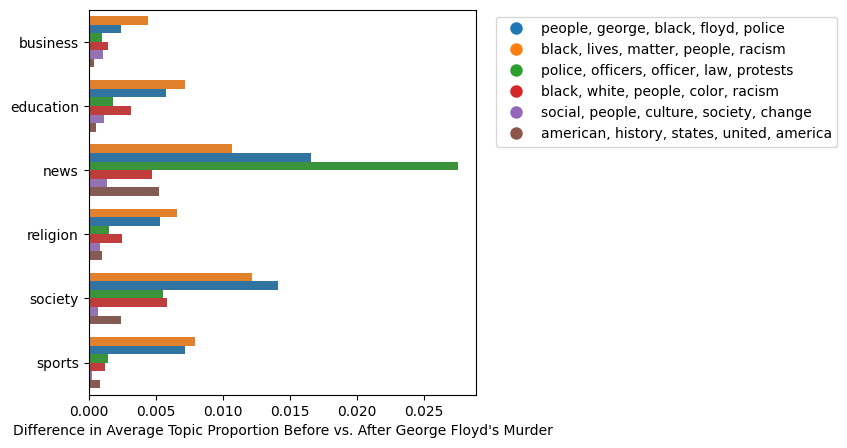

In [93]:
#write data for reproducibility 
topicDiffs.to_csv("/shared/3/projects/benlitterer/podcastData/figureData/floydFigures/floydCategoryTopicDiffs.csv")

fig, ax = plt.subplots(figsize=(5, 5))


topics = [13, 57, 159, 164, 69, 5]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
topicLabels = ["people, george, black, floyd, police", "black, lives, matter, people, racism","police, officers, officer, law, protests", "black, white, people, color, racism","social, people, culture, society, change","american, history, states, united, america"]
labelColorMapping = dict(zip(topicLabels, colors))
topicColorMapping = dict(zip(topics,colors))
topicLabelMapping = dict(zip(topics, topicLabels))

topicsOrder = [57, 13, 159, 164, 69, 5]
#sns.barplot(meltedTopics, x="value", y = "variable", orient="h", estimator="mean", order=topicsOrder, ax=ax, palette=[topicColorMapping[topic] for topic in topicsOrder])

sns.barplot(topicDiffs, x="topicDiff", y="category1", hue="variable", hue_order = topicsOrder, palette=[topicColorMapping[topic] for topic in topicsOrder], ax=ax)
ax.set_ylabel("") 
ax.set_xlabel("Difference in Average Topic Proportion Before vs. After George Floyd's Murder")

#for the legend 
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
topicList = ["people, george, black, floyd, police", "black, lives, matter, people, racism","police, officers, officer, law, protests", "black, white, people, color, racism","social, people, culture, society, change","american, history, states, united, america"]

colorMapping = dict(zip(topicList, colors))

# Create custom legend elements with the specified colors and labels
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colorMapping[topic], markersize=10) for topic in topicList]

# Add a single legend underneath the entire figure
ax.legend(legend_elements, topicList, loc='upper right', ncol=1, fontsize='medium', bbox_to_anchor=(1.95, 1))

#ax.set_title("Guest Network: Color by Category, Shape by Mention of George Floyd")
plt.savefig("/shared/3/projects/benlitterer/podcastData/figures/FloydFigures/categoryDiffs.pdf", bbox_inches="tight") 
plt.savefig("/shared/3/projects/benlitterer/podcastData/figures/FloydFigures/categoryDiffs.png", bbox_inches="tight", dpi=800) 

In [ ]:

fig, ax = plt.subplots(figsize=(5, 5))
topics = [13, 57, 159, 164, 69, 5]
#topicDiffs["variable"] = topicDiffs["variable"].astype(str) #.map(topicMap)
sns.barplot(topicDiffs, x="topicDiff", y="category1", hue="variable", hue_order = [str(topic) for topic in topics], ax=ax)
ax.set_ylabel("") 
ax.set_xlabel("Difference in Average Topic Proportion Before vs. After George Floyd's Murder")

#for the legend 
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
topicList = ["people, george, black, floyd, police", "black, lives, matter, people, racism","police, officers, officer, law, protests", "black, white, people, color, racism","social, people, culture, society, change","american, history, states, united, america"]

colorMapping = dict(zip(topicList, colors))

# Create custom legend elements with the specified colors and labels
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colorMapping[topic], markersize=10) for topic in topicList]

# Add a single legend underneath the entire figure
ax.legend(legend_elements, topicList, loc='upper right', ncol=1, fontsize='medium', bbox_to_anchor=(1.95, 1))

#ax.set_title("Guest Network: Color by Category, Shape by Mention of George Floyd")
plt.savefig("/shared/3/projects/benlitterer/podcastData/figures/FloydFigures/categoryDiffs.pdf", bbox_inches="tight") 
plt.savefig("/shared/3/projects/benlitterer/podcastData/figures/FloydFigures/categoryDiffs.png", bbox_inches="tight", dpi=800) 